<center>

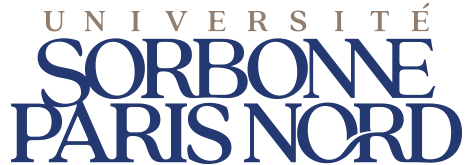

</center>

<h1><center><strong style="color: #293358">Nouvelles Bases de données<br/> BUT 3 - IUT Villetaneuse <br/> CockroachDB</strong></center></h1>

<center>
<h3 style="color: #8b7d6d"><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@sorbonne-paris-nord.fr</email>
<br/>
Year 2025-2026

Original Content

Licenced under Affero GNU3
</center>

# <strong style="color: #8b7d6d">Installation</strong>

In [ ]:
! wget https://binaries.cockroachdb.com/cockroach-v24.2.3.linux-amd64.tgz
! tar -xvzf cockroach-v24.2.3.linux-amd64.tgz 
! mkdir -p /usr/local/lib/cockroach
! cp -i cockroach-v24.2.3.linux-amd64/lib/libgeos.so /usr/local/lib/cockroach/
! cp -i cockroach-v24.2.3.linux-amd64/lib/libgeos_c.so /usr/local/lib/cockroach/

micro est une alternative à nano

In [ ]:
# sudo apt install micro ; apt update
! sudo micro /etc/profile 
# ajouter la ligne suivante en fin de fichier (adapter le chemin du dossier)
export PATH="/home/gael/Documents/cockroach-v24.2.3.linux-amd64:$PATH"

Vérifier que la commande `cockroach` est bien trouvée et où elle est prise en compte.

Vous verrez une vision d'ensemble de cette commande ici : https://www.cockroachlabs.com/docs/stable/cockroach-commands

In [ ]:
! which cockroach

Lancer cockroach DB en node unique, en localhost et en mode insecure (pas besoin de login etc.)

In [ ]:
! cockroach start-single-node --advertise-addr 'localhost' --insecure

Ouvrir le navigateur au localhost avec le port 8080 pour voir la joooolie interface graphique !

In [ ]:
! firefox http://localhost:8080

# <strong style="color: #8b7d6d">Cockroach SQL en terminal</strong>

#### 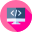 **TODO!**

Suivez le tutoriel disponible ici : https://www.cockroachlabs.com/docs/cockroachcloud/learn-cockroachdb-sql

Regardez les différences de CockroachDB résumées ici :
https://www.cockroachlabs.com/docs/stable/cockroachdb-in-comparison

In [ ]:
# pour lancer l'invite de commande cockroach dans le terminal : https://www.cockroachlabs.com/docs/stable/cockroach-sql
! cockroach sql --insecure

# <strong style="color: #8b7d6d">CRUD (Create Read Update Delete) en CockroachDB</strong>

Récupérer l'exemple officiel de cockroach en Python. Utilisez git et installez psycopg3 avec ses dépendances avec les commandes suivantes.

Psycopg (https://www.psycopg.org/) est un driver postgreSQL en python

In [ ]:
! git clone https://github.com/cockroachdb/example-app-python-psycopg3
! pip install --upgrade pip --break-system-packages
! pip install "psycopg[binary,pool]" --break-system-packages

Ici on met l'URL de la base de données dans la variable d'environnement. L'exemple officiel utilise cette valeur String pour se connecter au cluster et exécuter le code.

In [ ]:
! export DATABASE_URL="postgresql://root@localhost:26257/defaultdb?sslmode=disable"

In [ ]:
! cd example-app-python-psycopg3

#### 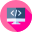 **TODO!**

Lancez le code et examinez le.

In [ ]:
! python3 example.py

#### 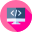 **TODO!**

Regardez ~/cockroach-data, qu'y voyez-vous ?

#### 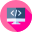 **TODO!**

Regardez la web interface, qu'y voyez-vous ?

Quelques liens utiles :

Support de SQL dans CockroachDB : https://www.cockroachlabs.com/docs/stable/sql-feature-support

LE lien de référence pour Psycopg 3 : https://www.psycopg.org/psycopg3/docs/basic/index.html

Documentation synthétique de POSTGRESQL : https://www.w3schools.com/postgresql/index.php

In [2]:
import uuid, psycopg, json
import pandas as pd
from psycopg.errors import SerializationFailure, Error
from psycopg.rows import namedtuple_row

#### 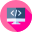 **TODO!**

Ouvrez le fichier JSON dans pandas et affichez le en format String.

In [4]:
import pandas as pd
import json

# Ouvrir le fichier JSON (par exemple "data.json")
df = pd.read_json("/home/uspn/Téléchargements/pokemons.json")

# Afficher le contenu du DataFrame au format string
print(df.to_string())


     Number         Name    Type_1    Type_2  Total   HP  Attack  Defense  Sp_Atk  Sp_Def  Speed  Generation  isLegendary   Color  hasGender  Pr_Male   Egg_Group_1 Egg_Group_2  hasMegaEvolution  Height_m  Weight_kg  Catch_Rate        Body_Style
0         1    Bulbasaur     Grass    Poison    318   45      49       49      65      65     45           1        False   Green       True    0.875       Monster       Grass             False      0.71        6.9          45         quadruped
1         2      Ivysaur     Grass    Poison    405   60      62       63      80      80     60           1        False   Green       True    0.875       Monster       Grass             False      0.99       13.0          45         quadruped
2         3     Venusaur     Grass    Poison    525   80      82       83     100     100     80           1        False   Green       True    0.875       Monster       Grass              True      2.01      100.0          45         quadruped
3         4   Charma

#### 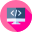 **TODO!**

Connectez-vous à la base données à partir de son URL. Inspirez-vous de l'exemple initial mais faites le en plus simple, sans accéder aux arguments ni à la variable d'environnement.

In [11]:
import psycopg

# URL de connexion à la base de données
DATABASE_URL = "postgresql://root@localhost:26257/defaultdb?sslmode=disable"

# Connexion à la base de données
with psycopg.connect(DATABASE_URL) as conn:
    with conn.cursor() as cur:
        # Exemple de requête simple
        cur.execute("SELECT now();")
        result = cur.fetchone()
        print("Connexion réussie ✅ - Heure actuelle :", result[0])


Connexion réussie ✅ - Heure actuelle : 2025-10-21 10:00:16.932790+00:00


#### 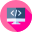 **TODO!**

Créez un cursor à l'aide de la connexion et executez la commande adéquate pour créer une base de données nommée `madb`. Gérer la suppression de la base de données si elle existe déjà.

Astuce :
- `.execute()` peut vous intéresser

In [ ]:
# code moi steupléé 


#### 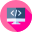 **TODO!**

Créez la table `pokemons` avec le bon schéma, dans la base de données `madb`.

In [ ]:
# code moi steupléé 🥺


#### 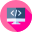 **TODO!**

Rendez-vous dans l'interface graphique et regardez le script de création de la table pokemons.

Voyez-vous des différences ?

In [22]:
# code moi steupléé 🥺

Les types ne sont pas les mêmes, avec un type float, int8 et string déjà considéré dans cockroachDB. Il s'agit donc bien d'une correspondance de syntaxe (i.e. un mapping)


#### 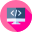 **TODO!**

Remplissez la table `pokemons` avec tous les pokémons. Si un pokémon existe déjà, le mettre à jour automatiquement.

Astuces :
- Une commande spécifique existe pour faire un INSERT ou un UPDATE automatiquement si l'élément existe. Regardez l'exemple initial.

In [15]:
# code moi steupléé 🥺

#### 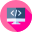 **TODO!**

Selectionnez tous les pokemons et visualisez les. Affichez chaque pokémon un par ligne

In [ ]:
# code moi steupléé 🥺

#### 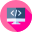 **TODO!**

Affichez le nombre de pokémons.

In [17]:
# code moi steupléé 🥺

[Row(count=721)]


#### 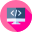 **TODO!**

Créer un index sur les couleurs.

In [ ]:
# code moi steupléé 🥺

#### 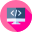 **TODO!**

Affichez les index de la table.

In [ ]:
# code moi steupléé 🥺

#### 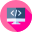 **TODO!**

Utilisez cet index pour récupérer les noms de tous les pokémons violets.

In [ ]:
# code moi steupléé 🥺


#### 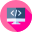 **TODO!**

Vérifiez quel index une requête va utiliser avec `EXPLAIN` et `ANALYZE`.

Astuce :
- L'explication officielle d'EXPLAIN : https://www.cockroachlabs.com/docs/v24.2/explain


In [ ]:
# code moi steupléé 🥺

#### 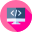 **TODO!**

Comparez une requête contenant `EXPLAIN`et `ANALYZE` sur une requête avec et sans un index.

Que constatez-vous ?

In [ ]:
# code moi steupléé 🥺

#### 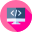 **TODO!**

Pour aller plus loin et essayer des transactions.

Voici un exercice officiel pour effectuer des transactions distribuées : https://www.cockroachlabs.com/docs/stable/demo-serializable#step-5-run-the-scenario-on-cockroachdb

Suivez et faites cet exercice directement dans le terminal.

In [30]:
# à faire dans le terminal
